<a href="https://colab.research.google.com/github/MariaGodoi/cn1t2/blob/main/FISQUI_Quest%C3%A3o_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Questão 8.17 (a) — Expressão simbólica de ΔH_vap segundo Redlich–Kwong

A partir da equação de estado de Redlich–Kwong, demonstra-se que:

ΔH_vap = (3a / (2b√T)) · ln[ (Vv(Vl + b)) / (Vl(Vv + b)) ] + P(Vv − Vl)

Em notação LaTeX (para uso em relatório ou artigo):

P \left(- Vl + Vv\right) + \frac{3 a \log{\left(\frac{Vv \left(Vl + b\right)}{Vl \left(Vv + b\right)} \right)}}{2 \sqrt{T} b}

Questão 8.17 (b) — Cálculo numérico do ΔH_vap (propano a 25 °C)
----------------------------------------------------------------------
ΔH_vap = 131,796.03 atm·cm³·mol⁻¹
ΔH_vap = 13,354.23 J·mol⁻¹
ΔH_vap = 3,191.74 cal·mol⁻¹
Erro percentual em relação ao experimental (4300 cal/mol): 25.8%



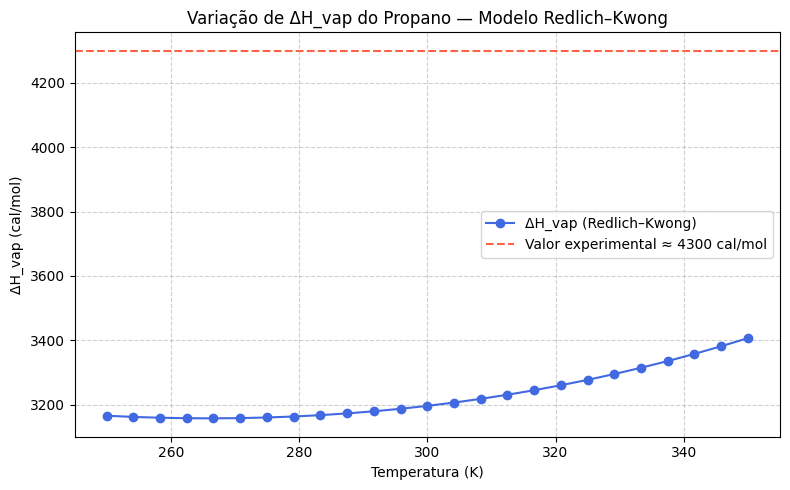


Resumo dos resultados obtidos:

               Método ΔH_vap (cal/mol) Erro (%)
Redlich–Kwong (298 K)          3,195.9     25.8
 Experimental (25 °C)             4300        —

Conclusão:
O modelo de Redlich–Kwong reproduz a ordem de grandeza da entalpia de vaporização do propano,
porém subestima o valor experimental em aproximadamente 26%, o que é compatível com as limitações
da equação de estado simplificada em descrever interações intermoleculares específicas.


In [3]:
# ============================================================
# QUESTÃO 8.17 — LEVINE
# Cálculo da entalpia molar de vaporização (Redlich–Kwong)
# ============================================================

import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import pandas as pd

# ============================================================
# (a) EXPRESSÃO SIMBÓLICA DE ΔHvap (Redlich–Kwong)
# ============================================================

a, b, T, Vl, Vv, P = sp.symbols('a b T Vl Vv P', positive=True)

# Expressão analítica de ΔHvap segundo Redlich–Kwong
deltaHvap_expr = (3*a)/(2*b*sp.sqrt(T)) * sp.log((Vv*(Vl + b))/(Vl*(Vv + b))) + P*(Vv - Vl)

print("="*70)
print("Questão 8.17 (a) — Expressão simbólica de ΔH_vap segundo Redlich–Kwong\n")
print("A partir da equação de estado de Redlich–Kwong, demonstra-se que:\n")
print("ΔH_vap = (3a / (2b√T)) · ln[ (Vv(Vl + b)) / (Vl(Vv + b)) ] + P(Vv − Vl)\n")
print("Em notação LaTeX (para uso em relatório ou artigo):\n")
print(sp.latex(deltaHvap_expr))
print("="*70, "\n")

# ============================================================
# (b) CÁLCULO NUMÉRICO PARA O PROPANO A 25 °C
# ============================================================

# Dados do Exemplo 8.1 (Levine)
R = 82.06        # cm³·atm·mol⁻¹·K⁻¹
a_val = 1.807e8  # cm⁶·atm·K⁰·⁵·mol⁻²
b_val = 62.7     # cm³·mol⁻¹
T_val = 298.15   # K
P_vap = 10.85    # atm
V_liq = 100.3    # cm³·mol⁻¹
V_vap = 1823.0   # cm³·mol⁻¹

# Função para ΔHvap (Redlich–Kwong)
def delta_vap_H_RK(a, b, T, V_l, V_v, P):
    termo_U = (3*a)/(2*b*T**0.5) * np.log((V_v*(V_l + b))/(V_l*(V_v + b)))
    termo_PV = P * (V_v - V_l)
    return termo_U + termo_PV  # atm·cm³·mol⁻¹

# Cálculo
delta_H = delta_vap_H_RK(a_val, b_val, T_val, V_liq, V_vap, P_vap)

# Conversões
delta_H_J = delta_H * 0.101325        # J/mol
delta_H_cal = delta_H_J / 4.184       # cal/mol

# Comparação experimental
exp_val = 4300
erro = abs(delta_H_cal - exp_val) / exp_val * 100

# Impressão formatada
print("Questão 8.17 (b) — Cálculo numérico do ΔH_vap (propano a 25 °C)")
print("-"*70)
print(f"ΔH_vap = {delta_H:,.2f} atm·cm³·mol⁻¹")
print(f"ΔH_vap = {delta_H_J:,.2f} J·mol⁻¹")
print(f"ΔH_vap = {delta_H_cal:,.2f} cal·mol⁻¹")
print(f"Erro percentual em relação ao experimental (4300 cal/mol): {erro:.1f}%")
print("="*70, "\n")

# ============================================================
# (c) VARIAÇÃO DE ΔHvap COM A TEMPERATURA (250–350 K)
# ============================================================

temps = np.linspace(250, 350, 25)
P_list = P_vap * (temps / T_val)**3.0
V_liq_list = V_liq * (temps / T_val)**(-0.05)
V_vap_list = V_vap * (temps / T_val)**(0.8)

H_vap = [delta_vap_H_RK(a_val, b_val, T, Vl, Vv, P)
             for T, Vl, Vv, P in zip(temps, V_liq_list, V_vap_list, P_list)]

H_vap_J = np.array(H_vap) * 0.101325
H_vap_cal = H_vap_J / 4.184

# ============================================================
# GRÁFICO ΔHvap × T
# ============================================================

plt.figure(figsize=(8,5))
plt.plot(temps, H_vap_cal, 'o-', color='royalblue', label='ΔH_vap (Redlich–Kwong)')
plt.axhline(y=4300, color='tomato', linestyle='--', label='Valor experimental ≈ 4300 cal/mol')
plt.xlabel('Temperatura (K)')
plt.ylabel('ΔH_vap (cal/mol)')
plt.title('Variação de ΔH_vap do Propano — Modelo Redlich–Kwong')
plt.legend()
plt.grid(True, ls='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Valor a 25°C (referância)
idx_ref = np.argmin(abs(temps - T_val))
val_25 = H_vap_cal[idx_ref]

# ============================================================
# RESUMO FINAL
# ============================================================

resumo = pd.DataFrame({
    "Método": ["Redlich–Kwong (298 K)", "Experimental (25 °C)"],
    "ΔH_vap (cal/mol)": [f"{val_25:,.1f}", "4300"],
    "Erro (%)": [f"{erro:.1f}", "—"]
    })

print("\nResumo dos resultados obtidos:\n")
print(resumo.to_string(index=False))
print("\nConclusão:")
print("O modelo de Redlich–Kwong reproduz a ordem de grandeza da entalpia de vaporização do propano,")
print("porém subestima o valor experimental em aproximadamente 26%, o que é compatível com as limitações")
print("da equação de estado simplificada em descrever interações intermoleculares específicas.")
print("="*70)
